In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle # to export the model for testing


import lightgbm as lgb # model that is used

pd.set_option('display.max_colwidth', None)

In [2]:
lgbm_without_stopwords = pd.read_csv('../../Data-Preparation/traindata_without_stopwords_preprocessed.csv')

In [3]:
# load the vectorizer from file
with open('../../Data-Preparation/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

TfidfVectorizer()


In [4]:
X = loaded_vectorizer.transform(lgbm_without_stopwords['Text'].astype(str))
y = lgbm_without_stopwords['target']

### without Hyperparametertuning

In [5]:
model1 = lgb.LGBMClassifier()
model1.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 39.835677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324513
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 22789
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [6]:
lgbm_without_stopwords['Prediction1'] = model1.predict(X)
lgbm_without_stopwords.head()

,Text,target,Ground_Truth_Label,Prediction1
0,Rise shining lol mins later planned rush door time,4,positive,4
1,2nd interview today looking promising,4,positive,4
2,feel pain,0,negative,0
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive,4
4,lonely housemates gone pub,0,negative,0


### with Hyperparametertuning

In [7]:
model2 = lgb.LGBMClassifier(
    num_leaves=300,
)
model2.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 74.788774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324513
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 22789
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(num_leaves=300)

In [8]:
lgbm_without_stopwords['Prediction2'] = model2.predict(X)
lgbm_without_stopwords.head()

,Text,target,Ground_Truth_Label,Prediction1,Prediction2
0,Rise shining lol mins later planned rush door time,4,positive,4,4
1,2nd interview today looking promising,4,positive,4,4
2,feel pain,0,negative,0,0
3,4yr old son went exploring amp hiking today found Luv amphibians,4,positive,4,4
4,lonely housemates gone pub,0,negative,0,0


### evaluation

In [9]:
# calculate metrics
accuracy = accuracy_score(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction1'])
precision = precision_score(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction1'], pos_label=4)
recall = recall_score(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction1'], pos_label=4)
f1 = f1_score(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction1'], pos_label=4)

# visualize metrics
print('LGBM without Hyperparametertuning')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print()



# calculate metrics
accuracy_2 = accuracy_score(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction2'])
precision_2 = precision_score(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction2'], pos_label=4)
recall_2 = recall_score(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction2'], pos_label=4)
f1_2 = f1_score(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction2'], pos_label=4)

# visualize metrics
print('LGBM with Hyperparametertuning')
print(f'Accuracy: {accuracy_2:.2f}')
print(f'Precision: {precision_2:.2f}')
print(f'Recall: {recall_2:.2f}')
print(f'F1 Score: {f1_2:.2f}')

LGBM without Hyperparametertuning
Accuracy: 0.74
Precision: 0.70
Recall: 0.82
F1 Score: 0.76

LGBM with Hyperparametertuning
Accuracy: 0.78
Precision: 0.76
Recall: 0.81
F1 Score: 0.79


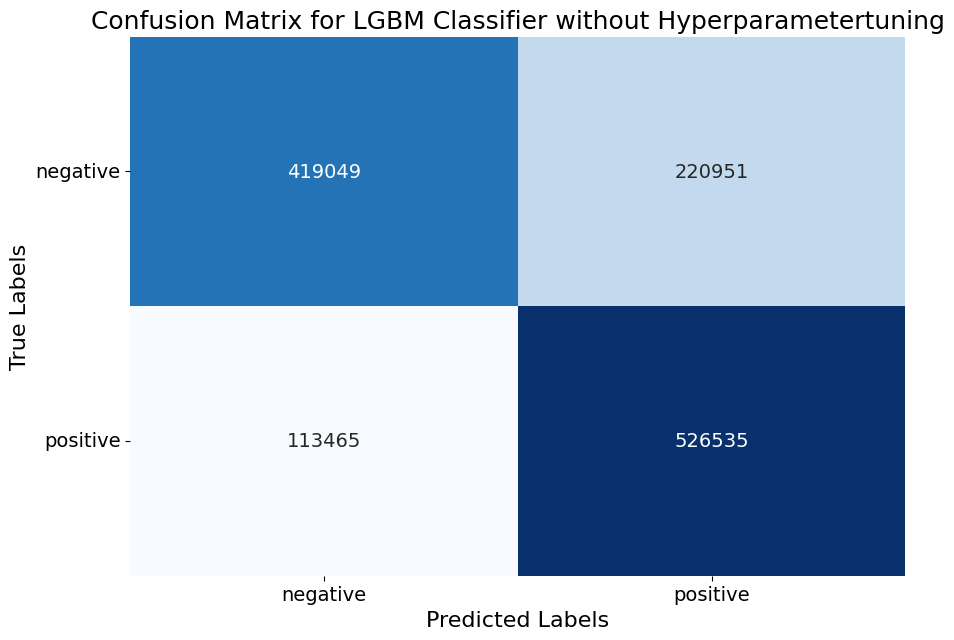

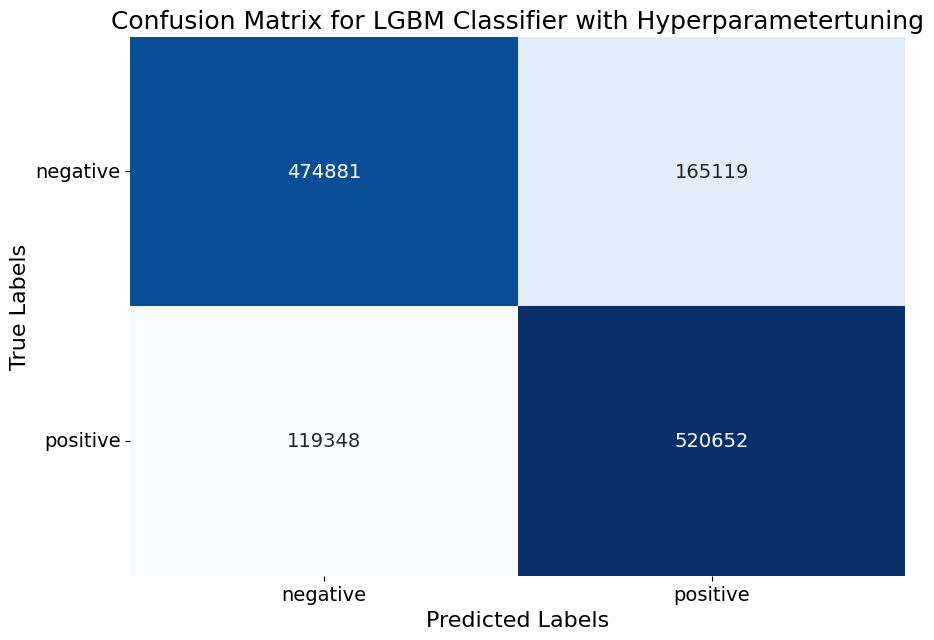

In [10]:
cm_nb = confusion_matrix(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction1'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier without Hyperparametertuning', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()


cm_nb = confusion_matrix(lgbm_without_stopwords['target'], lgbm_without_stopwords['Prediction2'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier with Hyperparametertuning', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()

### export better model

In [12]:
# model2 (with Hyperparametertuning) is exported since accuracy is higher
with open('lgbm_model_without_stopwords.pkl', 'wb') as file:
    pickle.dump(model2, file)